In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
sns.set_theme()

In [ ]:
# Load digits dataset from sklearn
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Normalize the data
train_X = X_train / 255.0
test_X = X_test / 255.0

# Use only 1/10 of the data to make it more manageable
X_train = X_train[:len(X_train)//10]
y_train = y_train[:len(y_train)//10]
X_test = X_test[:len(X_test)//10]
y_test = y_test[:len(y_test)//10]
print(X_train.shape)

In [ ]:
image = X_train[0]

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_train[0]}")  # Show the label for the image
plt.axis('off')  # Hide the axes
plt.show()

Above: Example 28x28 fashion image from the fashion dataset. A label of 9 corresponds to "Ankle Boot" and is one of 10 labels.

In [96]:
def distance(p, q):
    return np.sqrt((p-q)@(p-q))

In [117]:
def k_nearest_neighbors(point, training_features, training_labels, k):

    neighbors = []
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
    # Sort the training points by distance to the test point, with smallest distance first
    neighbors.sort(key = lambda x : x[-1])

    return neighbors[:k]

In [114]:
# Define k nearest neighbors classification algorithm (instead of regression)
def knn_predict(point, training_features, training_labels, k):

    neighbors = k_nearest_neighbors(point, training_features, training_labels, k)
    labels  = [x[1] for x in neighbors]
    return int((max(labels, key=labels.count)))

In [143]:
def classification_error(testing_features, testing_labels, training_features, training_labels, k):
    error = 0
    for point, label in zip(testing_features, testing_labels):
        error += label != knn_predict(point, training_features, training_labels, k)
    return error/len(testing_features)


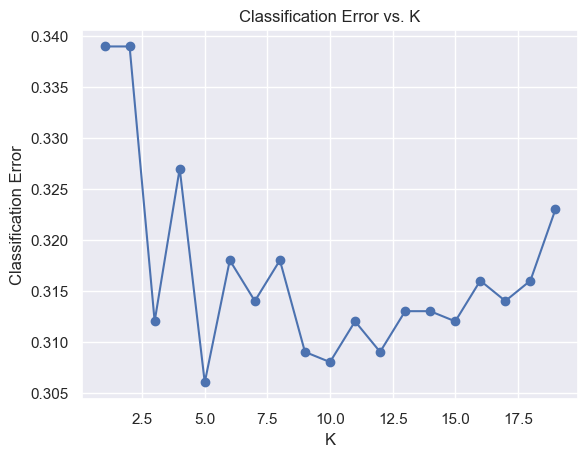

In [153]:
errors = []
for k in range(1,20):
    errors.append(classification_error(X_test, y_test, X_train, y_train, k))

x = list(range(1, len(errors) + 1))
plt.plot(x, errors, marker='o')
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. K')
plt.grid(True)
plt.show()


Conclusion:
For this dataset, I used only 1/10 of the 70,000 instances, because it would have taken multipl hours or more to run the k-nearest neighbors algorithm even once time. This is because the algorithm has to compute distances between every pair of feature vectors in the training set. This grows so quickly that for 70,000 instances, it is infeasible. Another note is that this algorithm is not particularly effective on datasets of this type, as it is not obvious that the pixel information of one instance will be "close" to others of the same class. For instance, if the image is nearly identical but shifted to the side by just one pixel, it could create a massive amount of distance, allowing for potentially less similar instances to be "closer". With the best choice of k, which in this case is 5, closely followed by 10 and 12, there is just over a 0.3 classification error. Randomly guessing would give a classification error of 0.9, so this algorithm is about 3 times better than random guessing. This is still a reasonably good result.